This script generates all the plots in the manuscript

In [1]:
# %matplotlib inline
import numpy as np
import fourier_prop_1D as fp
import matplotlib.pyplot as plt
import matplotlib as mpl
import tqdm
from scipy.optimize import minimize 
from scipy.optimize import curve_fit
from functools import partialmethod
from math import nan
from scipy.interpolate import UnivariateSpline
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in arcsin")

# help(fp)

#uncomment to enable tqdm output
#tqdm.tqdm.__init__ = partialmethod(tqdm.tqdm.__init__, disable=True)


#define font sizes used for plotting
SMALLER_SIZE = 12
SMALL_SIZE = 16
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

#the file directory that us used to save the files
FILE_DIR='./'

#load custom colormap used in plotting
cmap = np.load("./colormap.npy")
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

Initialize the laser parameters and simulation window

In [2]:
#center wavelength
wvl_0 = 800e-7 #cm

#FWHM of the spectrum
delta_wvl = 100e-7 #cm

#1/exp(2) input beam radius of the field intensity
w_in = 0.05 #cm

#length of the spatial simulation window
Lx = 8. #cm

#number of spatial grid points in simulation
Nx = 2**9 + 1

#calculate the 1/exp(2) radius of the spectral intensity used in the calculations
delta_omega = 2 * np.pi * 2.99792458e10 * delta_wvl / (np.sqrt(2 * np.log(2)) * wvl_0**2) #rad/s

#length of the frequency window 
L_omega = 120.63552 * delta_omega #rad/s

#number of frequency grid points in simulation 
N_omega = 2**13 + 1

#focal length of lens
focus = 10 #cm

Generates plots for Fig. 4

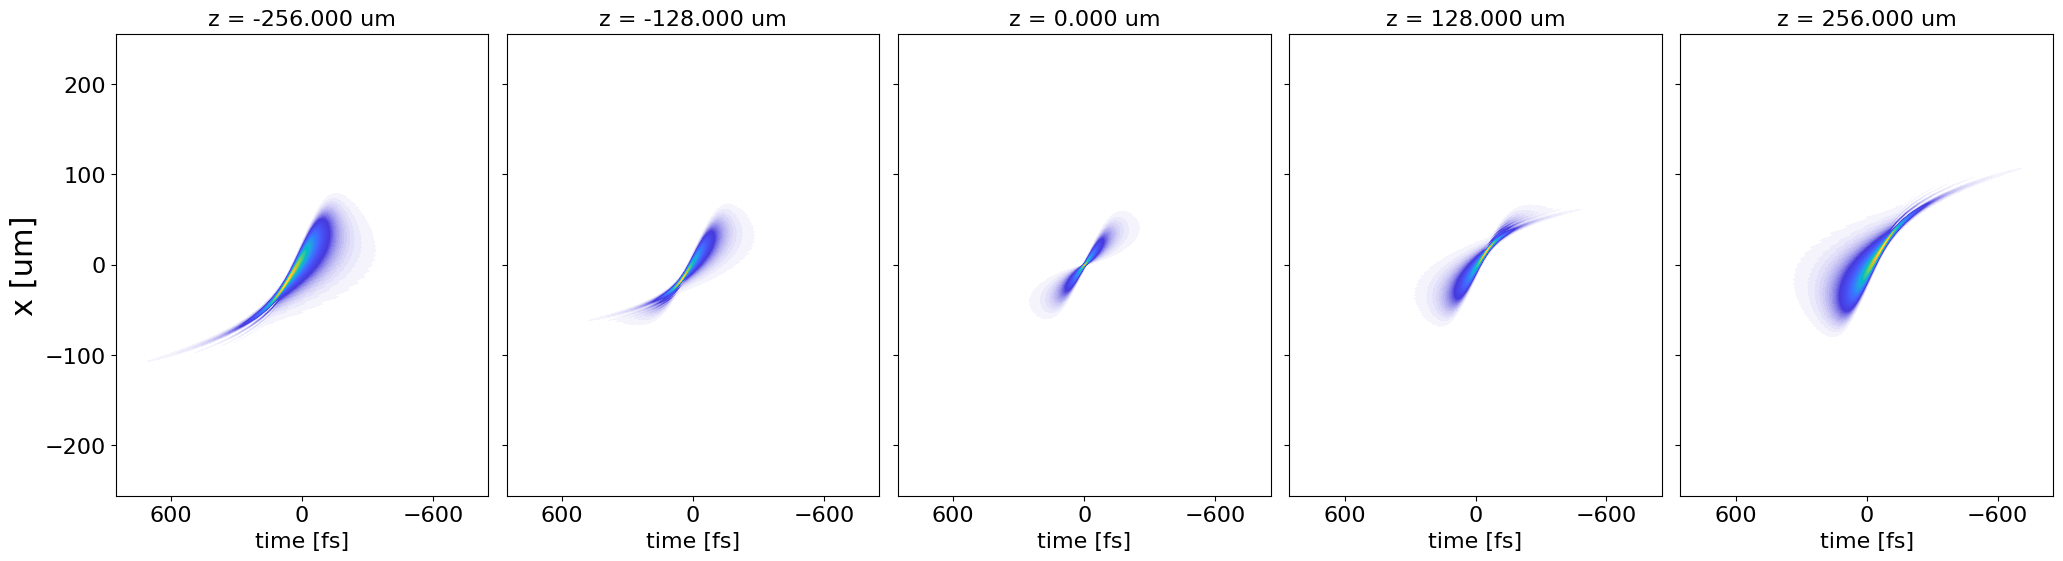

In [23]:
#define field for AOI 22.8 deg case and propagate to the focus
aoi228=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0., separation=1.97236328, d=1/(1480*10), aoi=np.deg2rad(22.8), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)
aoi228.construct_eField(plot=False)
aoi228.fraunhofer()

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loops through 5 longitudinal z positions based on the time array of the field
for i in tqdm.tqdm(range(5)):
    timestep=i*2048

    #propagate to z position from focus
    aoi228.aspw(zs=np.array(aoi228.timeshift[timestep]*0.3*1e15/1e4),plot=False)

    ax[i].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[i].set_title(f'z = {(aoi228.timeshift[timestep]*0.3*1e15):.3f} um',fontsize=SMALL_SIZE)
    ax[i].set_xlabel('time [fs]',fontsize=SMALL_SIZE)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax[i].imshow(np.abs(aoi228.eFieldxt2[:,:]**2).T,origin='lower',aspect='auto',extent=[aoi228.timeshift.max()*1e15,aoi228.timeshift.min()*1e15,aoi228.x2.min()*1e4,aoi228.x2.max()*1e4],cmap=cmap)
    if i != 0:
        ax[i].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)

# plt.savefig(FILE_DIR+"t_aoi228.pdf",bbox_inches = "tight")
plt.show()

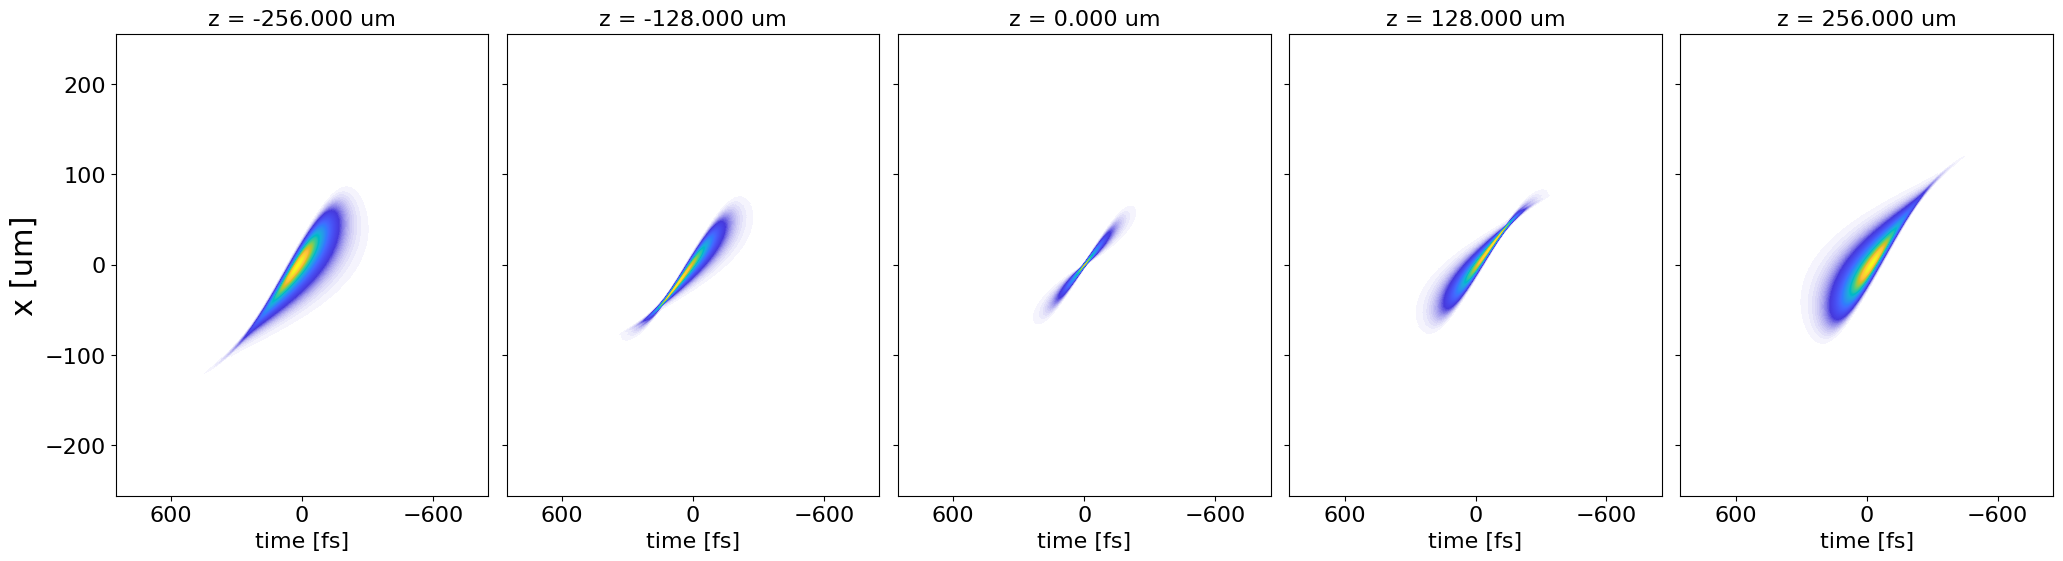

In [24]:
#define field for AOI 36.3 deg case and propagate to the focus
aoi36=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0., separation=4.45043945, d=1/(1480*10), aoi=np.deg2rad(36.3), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)
aoi36.construct_eField(plot=False)
aoi36.fraunhofer()

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loops through 5 longitudinal z positions based on the time array of the field
for i in tqdm.tqdm(range(5)):
    timestep=i*2048

    #propagate to z position from focus
    aoi36.aspw(zs=np.array(aoi36.timeshift[timestep]*0.3*1e15/1e4),plot=False)

    ax[i].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[i].set_title(f'z = {(aoi36.timeshift[timestep]*0.3*1e15):.3f} um',fontsize=SMALL_SIZE)
    ax[i].set_xlabel('time [fs]',fontsize=SMALL_SIZE)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax[i].imshow(np.abs(aoi36.eFieldxt2[:,:]**2).T,origin='lower',aspect='auto',extent=[aoi36.timeshift.max()*1e15,aoi36.timeshift.min()*1e15,aoi36.x2.min()*1e4,aoi36.x2.max()*1e4],cmap=cmap)
    if i != 0:
        ax[i].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)

# plt.savefig(FILE_DIR+"t_aoi36.pdf",bbox_inches = "tight")
plt.show()

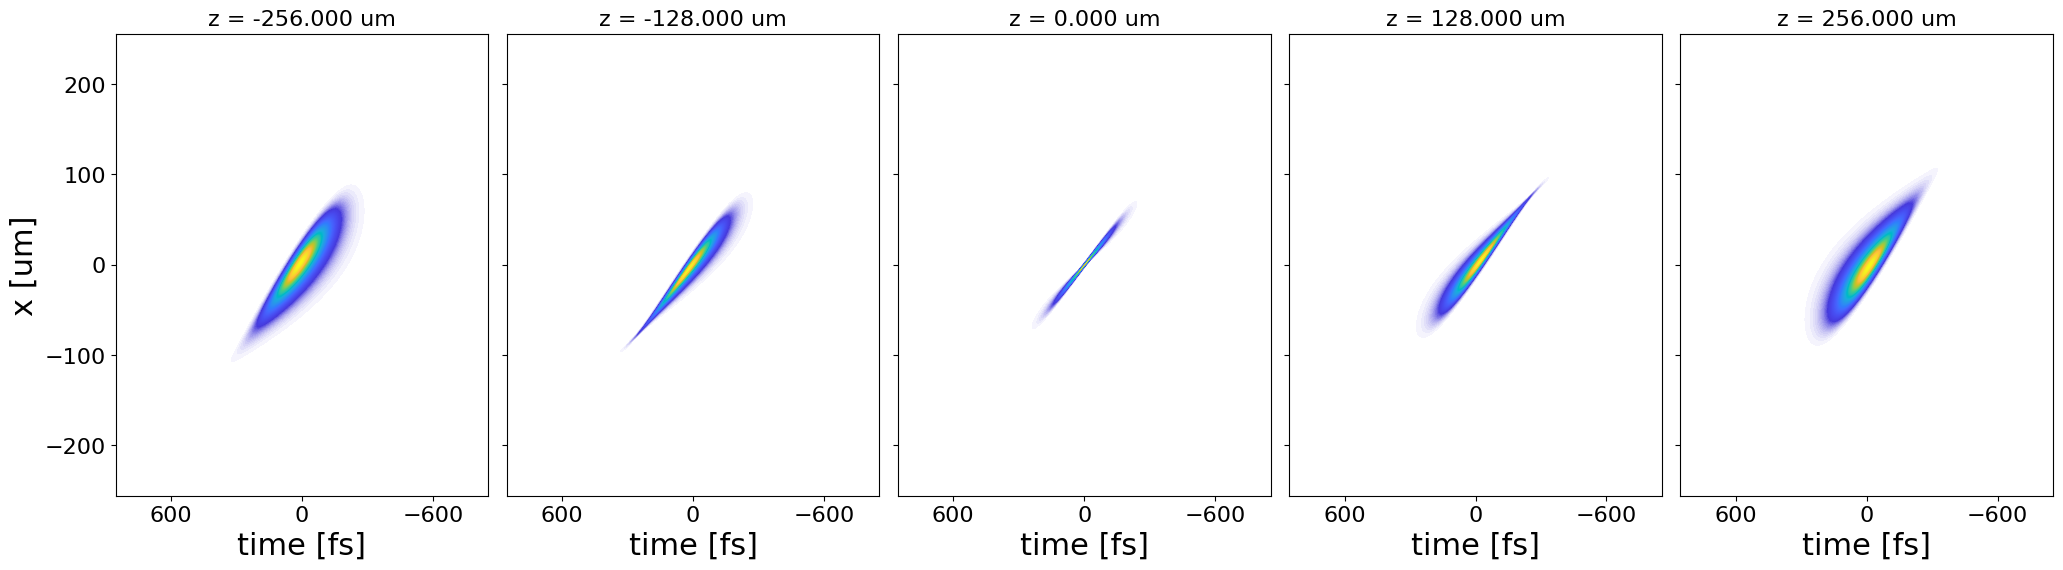

In [25]:
#define field for AOI 52.8 deg case and propagate to the focus
aoi528=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0., separation=6.59560547, d=1/(1480*10), aoi=np.deg2rad(52.8), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)
aoi528.construct_eField(plot=False)
aoi528.fraunhofer()

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loops through 5 longitudinal z positions based on the time array of the field
for i in tqdm.tqdm(range(5)):
    timestep=i*2048

    #propagate to z position from focus
    aoi528.aspw(zs=np.array(aoi528.timeshift[timestep]*0.3*1e15/1e4),plot=False)

    ax[i].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[i].set_title(f'z = {(aoi528.timeshift[timestep]*0.3*1e15):.3f} um',fontsize=SMALL_SIZE)
    ax[i].set_xlabel('time [fs]',fontsize=MEDIUM_SIZE)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax[i].imshow(np.abs(aoi528.eFieldxt2[:,:]**2).T,origin='lower',aspect='auto',extent=[aoi528.timeshift.max()*1e15,aoi528.timeshift.min()*1e15,aoi528.x2.min()*1e4,aoi528.x2.max()*1e4],cmap=cmap)
    if i != 0:
        ax[i].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)

# plt.savefig(FILE_DIR+"t_aoi528.pdf",bbox_inches = "tight")
plt.show()

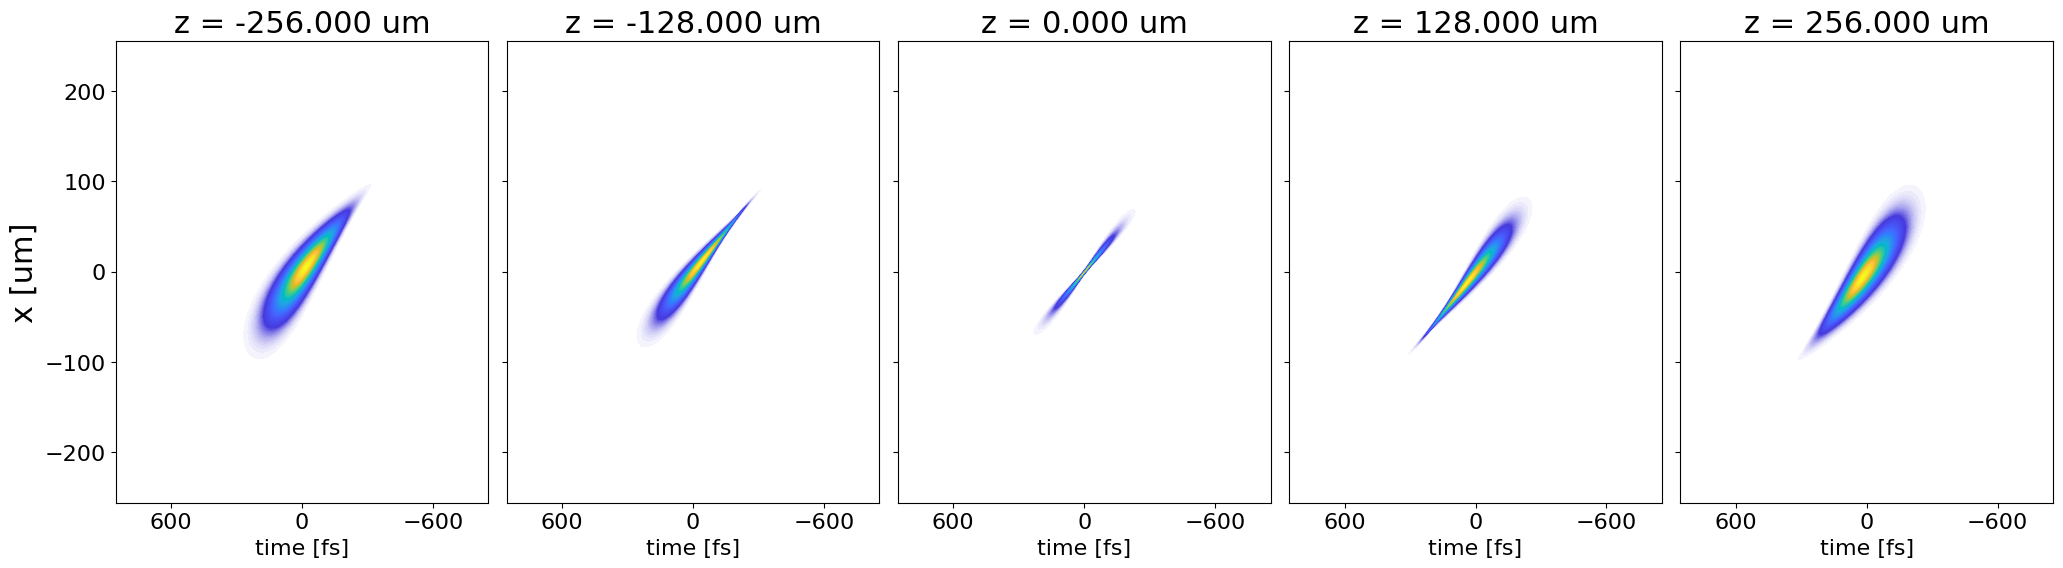

In [26]:
#define field for linear approximation case and propagate to the focus
aoi_linear=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear', BAR=20.98034668, deltax=0., separation=4.45043945, d=1/(1480*10), aoi=np.deg2rad(36.3), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)
aoi_linear.construct_eField(plot=False)
aoi_linear.fraunhofer()

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loops through 5 longitudinal z positions based on the time array of the field
for i in tqdm.tqdm(range(5)):
    timestep=i*2048

    #propagate to z position from focus
    aoi_linear.aspw(zs=np.array(aoi_linear.timeshift[timestep]*0.3*1e15/1e4),plot=False)

    ax[i].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[i].set_title(f'z = {(aoi_linear.timeshift[timestep]*0.3*1e15):.3f} um',fontsize=MEDIUM_SIZE)
    ax[i].set_xlabel('time [fs]',fontsize=SMALL_SIZE)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax[i].imshow(np.abs(aoi_linear.eFieldxt2[:,:]**2).T,origin='lower',aspect='auto',extent=[aoi_linear.timeshift.max()*1e15,aoi_linear.timeshift.min()*1e15,aoi_linear.x2.min()*1e4,aoi_linear.x2.max()*1e4],cmap=cmap)
    if i != 0:
        ax[i].set_yticklabels([])   
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)

# plt.savefig(FILE_DIR+"t_aoi_linear.pdf",bbox_inches = "tight")
plt.show()

Generates plots for Fig. 7

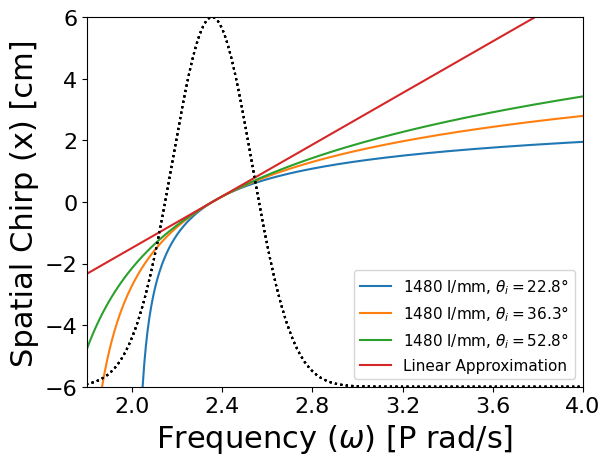

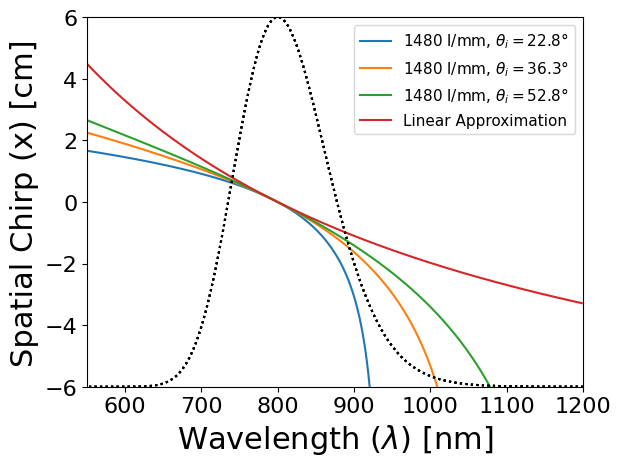

In [7]:
#define an x limit (in terms of angular frequency) to cutoff for plotting. Certain grating configurations
#result in values that asymptote
xlim=2*np.pi*fp.c/1200e-7

#define array for which fields to loop through
fields=[aoi228,aoi36,aoi528,aoi_linear]

#loop through fields and calculate the spatial chirp as a function of frequency
for field in fields:

    #defines the index of the peak value of the spectrum
    idx_omega=np.argmax(np.exp(-(field.omegas-field.omega_0)**2/field.delta_omega**2))

    #extract x position values of the spatially chirped frequency content
    field_x=field.x_vals #cm

    #shift so that the center frequency is centered at zero
    field_plot=field_x-field_x[idx_omega]

    #cut off values by setting to nan
    field_plot[field.omegas<xlim]=nan
    field_plot[field_plot<-10]=nan
    field_plot[field_plot>10]=nan
    field_omegas=field.omegas[~np.isnan(field_plot)] #rad/s
    field_plot=field_plot[~np.isnan(field_plot)]

    #define figure for plotting in frequency domain
    plt.figure(1)
    ax = plt.subplot()
    
    #plot data and set correct labels
    if field.chirp_pattern=="linear_grating_centered":
        plt.plot(field_omegas/1e15,field_plot,label=f'1480 l/mm, $\\theta_i={np.rad2deg(field.aoi):.1f}\degree$')
    else:
        plt.plot(field_omegas/1e15,field_plot,label=f'Linear Approximation')

    #overlay spectrum on the plot
    plt.plot(field.omegas/1e15,np.exp(-(field.omegas-field.omega_0)**2/field.delta_omega**2)*12-6,'k:')
    
    plt.ylim(-6,6)
    plt.xlim(1.8,4)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.xticks(fontsize=SMALL_SIZE)
    plt.yticks(fontsize=SMALL_SIZE)
    plt.xlabel('Frequency ($\\omega$) [P rad/s]',fontsize=MEDIUM_SIZE)
    plt.ylabel('Spatial Chirp (x) [cm]',fontsize=MEDIUM_SIZE)
    plt.legend(fontsize=11)

    # plt.savefig(FILE_DIR+"plots/freq.pdf",bbox_inches = "tight")


    #define figure for plotting in wavelength domain
    plt.figure(2)

    if field.chirp_pattern=="linear_grating_centered":  
        plt.plot(2*np.pi*fp.c/field_omegas*1e7,field_plot,label=f'1480 l/mm, $\\theta_i={np.rad2deg(field.aoi):.1f}\degree$')
    else:
        plt.plot(2*np.pi*fp.c/field_omegas*1e7,field_plot,label=f'Linear Approximation')

    #overlay spectrum on the plot
    plt.plot(2*np.pi*fp.c/field.omegas*1e7,np.exp(-(field.omegas-field.omega_0)**2/field.delta_omega**2)*12-6,'k:')

    plt.xlim(550,1200)
    
    plt.xticks(fontsize=SMALL_SIZE)
    plt.yticks(fontsize=SMALL_SIZE)
    plt.xlabel('Wavelength ($\\lambda$) [nm]',fontsize=MEDIUM_SIZE)
    plt.ylabel('Spatial Chirp (x) [cm]',fontsize=MEDIUM_SIZE)
    plt.ylim(-6,6)
    plt.legend(fontsize=11)

    # plt.savefig(FILE_DIR+"wvl.pdf",bbox_inches = "tight")
plt.show()


Generate plot for Fig. 2

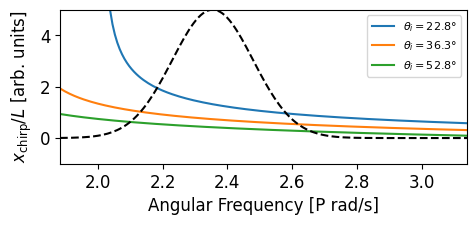

In [8]:
#define frequency array that is higher resolution than the simulation parameters for this figure

omega_0=2*np.pi*fp.c / wvl_0
omegas=np.linspace(omega_0-L_omega,omega_0+L_omega,N_omega)

#define the groove spacing for a 1480 lines/mm grating
d=1/(1480*10)

#create arrays for plotting
arr1=[]
arr2=[]
arr3=[]

#loop through frequencies and generated the x positions as defined by the grating equation (Eq. )
for omega in omegas:

    #x_chirp position values for an AOI of 22.8 degrees
    arr1.append(np.tan(np.arcsin(2*np.pi*fp.c/(omega*d)-np.sin(np.deg2rad(22.8)))))

    #x_chirp position values for an AOI of 36.3 degrees
    arr2.append(np.tan(np.arcsin(2*np.pi*fp.c/(omega*d)-np.sin(np.deg2rad(36.3)))))

    #x_chirp position values for an AOI of 52.8 degrees
    arr3.append(np.tan(np.arcsin(2*np.pi*fp.c/(omega*d)-np.sin(np.deg2rad(52.8)))))
    
#define figure for plotting and plot
plt.figure(figsize=(5.25,2))

plt.plot(omegas/1e15,arr1,label='$\\theta_i = 22.8 \degree$')
plt.plot(omegas/1e15,arr2,label='$\\theta_i = 36.3 \degree$')
plt.plot(omegas/1e15,arr3,label='$\\theta_i = 52.8 \degree$')

plt.plot(omegas/1e15,5*(np.abs(np.exp(-(omegas-omega_0)**2/delta_omega**2))**2)/np.max(np.abs(np.exp(-(omegas-omega_0)**2/delta_omega**2))**2),'k--')

plt.xlim(2*np.pi*2.99792458e10 / 1000e-7/1e15,2*np.pi*2.99792458e10 / 600e-7/1e15)
plt.ylim(-1,5)
plt.xlabel('Angular Frequency [P rad/s]', fontsize=SMALLER_SIZE)
plt.ylabel(r"$x_{\mathrm{chirp}}/L$ [arb. units]", fontsize=SMALLER_SIZE)
plt.legend(prop={'size': 8})


plt.xticks(fontsize=SMALLER_SIZE)
plt.yticks(fontsize=SMALLER_SIZE)
# plt.savefig(FILE_DIR+"nonlinear_grating.pdf",bbox_inches = "tight")
plt.show()

Generates plots for Fig. 3

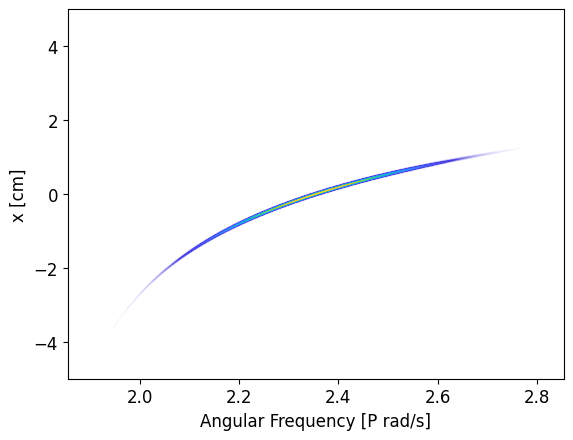

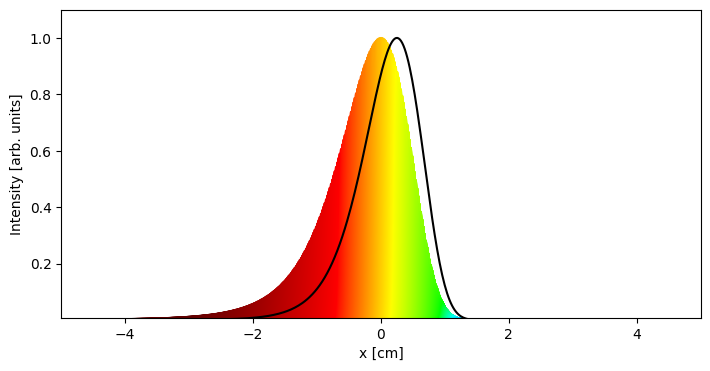

In [9]:
#define field for AOI 22.8 deg case
#NOTE: N_omega=0 which is a flag in the code to set the frequency array to be symmetric about the center frequency
#this is so that the plots are only generated for the relevant high amplitude spectrum components and can be higher resolution for the figures

aoi228=fp.FourierProp(delta_wvl=100e-7, L=10, N=2**9+1, N_omega=0, L_omega=4*delta_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0.0, separation=4.45043945, d=1/(1480*10), aoi=np.deg2rad(36.3), w_in=w_in, focus = focus)
aoi228.construct_eField(plot=False)

#plots the field in the space-frequency domain to show the spatial chirp as a function of frequency
plt.imshow(np.abs(aoi228.u1[:,:].T**2),origin='lower',extent=[aoi228.omegas.min()/(1e15),aoi228.omegas.max()/(1e15),aoi228.x.min(),aoi228.x.max()],aspect='auto',cmap=cmap)
plt.xlabel("Angular Frequency [P rad/s]",fontsize=SMALLER_SIZE)
plt.ylabel('x [cm]',fontsize=SMALLER_SIZE)
plt.xticks(fontsize=SMALLER_SIZE)
plt.yticks(fontsize=SMALLER_SIZE)

# plt.savefig(FILE_DIR+"xw_chirp_aoi228.pdf",bbox_inches = "tight")

#calculate the temporal field at the input plane of the simulation (before the lens)
eFieldxt_lens =np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(aoi228.u1),axis=0))


#define figure for plotting
plt.figure(figsize=(8.25,4))

#define normalization outside of loop for speedup
maxval=np.max(np.abs(aoi228.u1[:,:]**2))

#plot each frequency component at its x-position and color relative to its wavelength
for i in tqdm.tqdm(range(aoi228.N_omega)):
    plt.plot(aoi228.x, np.abs(aoi228.u1[i,:]**2)/maxval, color=fp.wavelength_to_rgb(2*np.pi*fp.c/(aoi228.omegas[i])*1e7), linestyle='-', alpha=0.5);

#plot the temporal profile
plt.plot(aoi228.x,np.abs(eFieldxt_lens[aoi228.N_omega//2,:]**2)/np.max(np.abs(eFieldxt_lens[aoi228.N_omega//2,:]**2)),color='k',label='chirp')

plt.ylim(0.008,1.1)
plt.xlim(-5,5)

plt.xlabel('x [cm]', fontsize=10)
plt.ylabel('Intensity [arb. units]', fontsize=10)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
# plt.savefig(FILE_DIR+"transverse_xw_chirp_aoi228.pdf",bbox_inches = "tight")
plt.show()


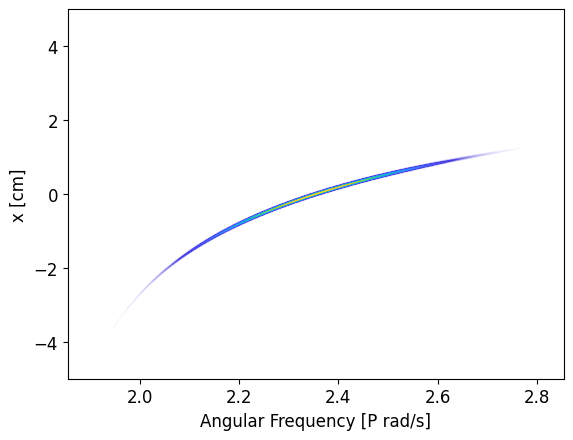

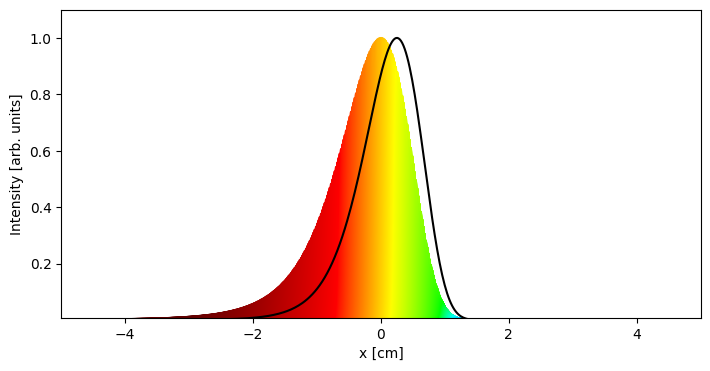

In [10]:
#define field for AOI 36.3 deg case
#NOTE: N_omega=0 which is a flag in the code to set the frequency array to be symmetric about the center frequency. 
#this is so that the plots are only generated for the relevant high amplitude spectrum components and can be higher resolution for the figures

aoi36=fp.FourierProp(delta_wvl=100e-7, L=10, N=2**9+1, N_omega=0, L_omega=4*delta_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0.0, separation=4.45043945, d=1/(1480*10), aoi=np.deg2rad(36.3), w_in=w_in, focus = focus)
aoi36.construct_eField(plot=False)

#plots the field in the space-frequency domain to show the spatial chirp as a function of frequency
plt.imshow(np.abs(aoi36.u1[:,:].T**2),origin='lower',extent=[aoi36.omegas.min()/(1e15),aoi36.omegas.max()/(1e15),aoi36.x.min(),aoi36.x.max()],aspect='auto',cmap=cmap)
plt.xlabel("Angular Frequency [P rad/s]",fontsize=SMALLER_SIZE)
plt.ylabel('x [cm]',fontsize=SMALLER_SIZE)
plt.xticks(fontsize=SMALLER_SIZE)
plt.yticks(fontsize=SMALLER_SIZE)

# plt.savefig(FILE_DIR+"xw_chirp_aoi36.pdf",bbox_inches = "tight")


#calculate the temporal field at the input plane of the simulation (before the lens)
eFieldxt_lens =np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(aoi36.u1),axis=0))

#define figure for plotting
plt.figure(figsize=(8.25,4))

#define normalization outside of loop for speedup
maxval=np.max(np.abs(aoi36.u1[:,:]**2))

#plot each frequency component at its x-position and color relative to its wavelength
for i in tqdm.tqdm(range(aoi36.N_omega)):
    plt.plot(aoi36.x, np.abs(aoi36.u1[i,:]**2)/maxval, color=fp.wavelength_to_rgb(2*np.pi*fp.c/(aoi36.omegas[i])*1e7), linestyle='-', alpha=0.5)

#plot the temporal profile
plt.plot(aoi36.x,np.abs(eFieldxt_lens[aoi36.N_omega//2,:]**2)/np.max(np.abs(eFieldxt_lens[aoi36.N_omega//2,:]**2)),color='k',label='chirp')
plt.ylim(0.008,1.1)
plt.xlim(-5,5)

plt.xlabel('x [cm]', fontsize=10)
plt.ylabel('Intensity [arb. units]', fontsize=10)

plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
# plt.savefig(FILE_DIR+"transverse_xw_chirp_aoi36.pdf",bbox_inches = "tight")
plt.show()


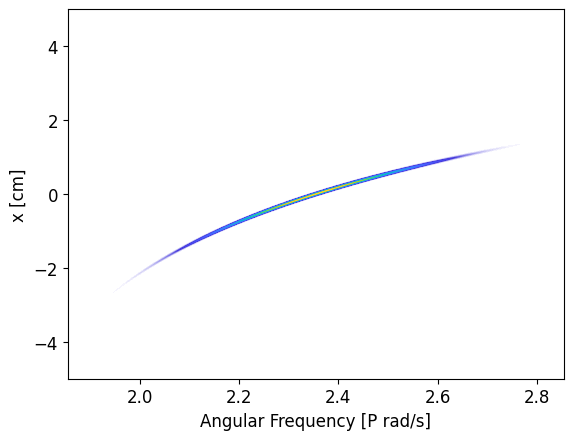

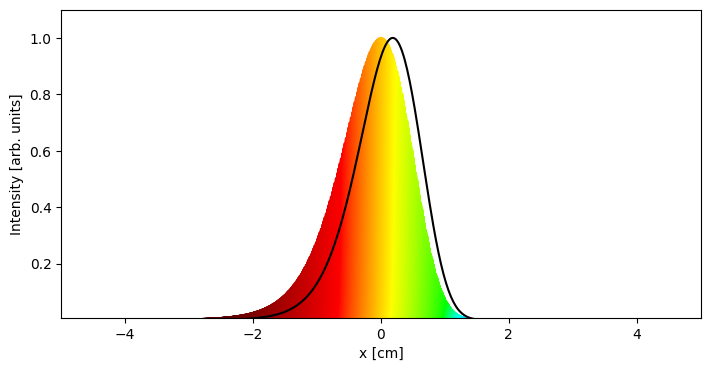

In [11]:
#define field for AOI 52.8 deg case
#NOTE: N_omega=0 which is a flag in the code to set the frequency array to be symmetric about the center frequency. 
#this is so that the plots are only generated for the relevant high amplitude spectrum components and can be higher resolution for the figures

aoi528=fp.FourierProp(delta_wvl=100e-7, L=10, N=2**9+1, N_omega=0, L_omega=4*delta_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0.0, separation=6.59560547, d=1/(1480*10), aoi=np.deg2rad(52.8), w_in=w_in, focus = focus)
aoi528.construct_eField(plot=False)

#plots the field in the space-frequency domain to show the spatial chirp as a function of frequency
plt.imshow(np.abs(aoi528.u1[:,:].T**2),origin='lower',extent=[aoi528.omegas.min()/(1e15),aoi528.omegas.max()/(1e15),aoi528.x.min(),aoi528.x.max()],aspect='auto',cmap=cmap)
plt.xlabel("Angular Frequency [P rad/s]",fontsize=SMALLER_SIZE)
plt.ylabel('x [cm]',fontsize=SMALLER_SIZE)
plt.xticks(fontsize=SMALLER_SIZE)
plt.yticks(fontsize=SMALLER_SIZE)
# plt.savefig(FILE_DIR+"xw_chirp_aoi528.pdf",bbox_inches = "tight")


#calculate the temporal field at the input plane of the simulation (before the lens)
eFieldxt_lens =np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(aoi528.u1),axis=0))

#define figure for plotting
plt.figure(figsize=(8.25,4))

#define normalization outside of loop for speedup
maxval=np.max(np.abs(aoi528.u1[:,:]**2))

#plot each frequency component at its x-position and color relative to its wavelength
for i in tqdm.tqdm(range(aoi528.N_omega)):
    plt.plot(aoi528.x, np.abs(aoi528.u1[i,:]**2)/maxval, color=fp.wavelength_to_rgb(2*np.pi*fp.c/(aoi528.omegas[i])*1e7), linestyle='-', alpha=0.5)

#plot the temporal profile
plt.plot(aoi528.x,np.abs(eFieldxt_lens[aoi528.N_omega//2,:]**2)/np.max(np.abs(eFieldxt_lens[aoi528.N_omega//2,:]**2)),color='k',label='chirp')
plt.ylim(0.008,1.1)
plt.xlim(-5,5)
plt.xlabel('x [cm]', fontsize=10)
plt.ylabel('Intensity [arb. units]', fontsize=10)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
# plt.savefig(FILE_DIR+"transverse_xw_chirp_aoi528.pdf",bbox_inches = "tight")
plt.show()

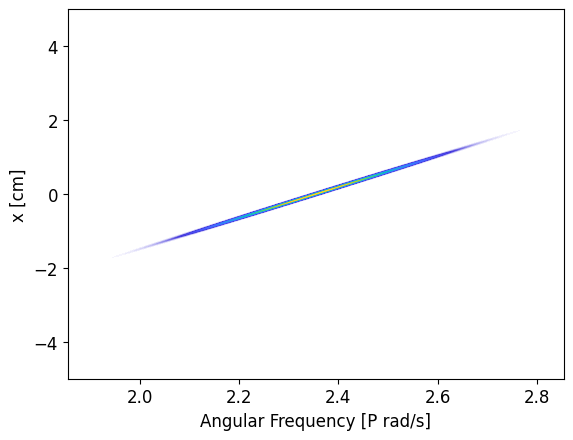

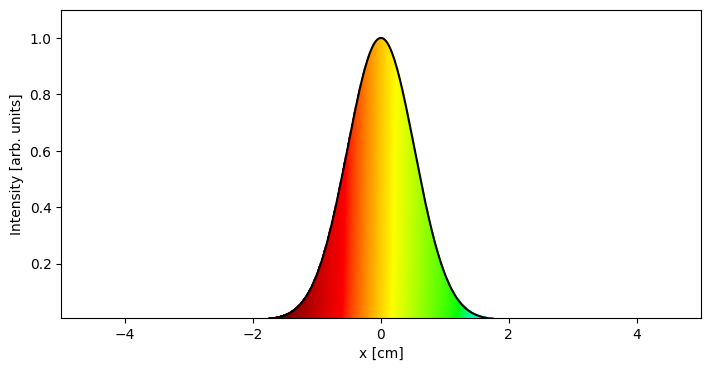

In [12]:
#define field for AOI 52.8 deg case
#NOTE: N_omega=0 which is a flag in the code to set the frequency array to be symmetric about the center frequency. 
#this is so that the plots are only generated for the relevant high amplitude spectrum components and can be higher resolution for the figures

linear=fp.FourierProp(delta_wvl=100e-7, L=10, N=2**9+1, N_omega=0, L_omega=4*delta_omega, chirp_pattern='linear', BAR=20.98034668, deltax=0.0, separation=6.59560547, d=1/(1480*10), aoi=np.deg2rad(52.8), w_in=w_in, focus = focus)
linear.construct_eField(plot=False)

#plots the field in the space-frequency domain to show the spatial chirp as a function of frequency
plt.imshow(np.abs(linear.u1[:,:].T**2),origin='lower',extent=[linear.omegas.min()/(1e15),linear.omegas.max()/(1e15),linear.x.min(),linear.x.max()],aspect='auto',cmap=cmap)
plt.xlabel("Angular Frequency [P rad/s]",fontsize=SMALLER_SIZE)
plt.ylabel('x [cm]',fontsize=SMALLER_SIZE)
plt.xticks(fontsize=SMALLER_SIZE)
plt.yticks(fontsize=SMALLER_SIZE)
# plt.savefig(FILE_DIR+"xw_chirp_aoi_linear.pdf",bbox_inches = "tight")


#calculate the temporal field at the input plane of the simulation (before the lens)
eFieldxt_lens =np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(linear.u1),axis=0))


#define figure for plotting
plt.figure(figsize=(8.25,4))

#define normalization outside of loop for speedup
maxval=np.max(np.abs(linear.u1[:,:]**2))

#plot each frequency component at its x-position and color relative to its wavelength
for i in tqdm.tqdm(range(linear.N_omega)):
    plt.plot(linear.x, np.abs(linear.u1[i,:]**2)/maxval, color=fp.wavelength_to_rgb(2*np.pi*fp.c/(linear.omegas[i])*1e7), linestyle='-', alpha=0.5)

plt.plot(linear.x,np.abs(eFieldxt_lens[linear.N_omega//2,:]**2)/np.max(np.abs(eFieldxt_lens[linear.N_omega//2,:]**2)),color='k',label='chirp')
plt.ylim(0.008,1.1)
plt.xlim(-5,5)
plt.xlabel('x [cm]', fontsize=10)
plt.ylabel('Intensity [arb. units]', fontsize=10)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
# plt.savefig(FILE_DIR+"transverse_xw_chirp_aoi_linear.pdf",bbox_inches = "tight")
plt.show()

In [13]:
#load data files in
x_max_aoi_linear=np.load(FILE_DIR+'x_max_aoi_linear.npy')
x_max_aoi228=np.load(FILE_DIR+'x_max_aoi228.npy')
x_max_aoi36=np.load(FILE_DIR+'x_max_aoi36.npy')
x_max_aoi528=np.load(FILE_DIR+'x_max_aoi528.npy')

z_max_aoi_linear=np.load(FILE_DIR+'z_max_aoi_linear.npy')
z_max_aoi228=np.load(FILE_DIR+'z_max_aoi228.npy')
z_max_aoi36=np.load(FILE_DIR+'z_max_aoi36.npy')
z_max_aoi528=np.load(FILE_DIR+'z_max_aoi528.npy')

I_max_aoi_linear=np.load(FILE_DIR+'I_max_aoi_linear.npy')
I_max_aoi228=np.load(FILE_DIR+'I_max_aoi228.npy')
I_max_aoi36=np.load(FILE_DIR+'I_max_aoi36.npy')
I_max_aoi528=np.load(FILE_DIR+'I_max_aoi528.npy')

x_max_aoi_linear_fit=np.load(FILE_DIR+'x_max_aoi_linear_fit.npy',allow_pickle=True)
x_max_aoi228_fit=np.load(FILE_DIR+'x_max_aoi228_fit.npy',allow_pickle=True)
x_max_aoi36_fit=np.load(FILE_DIR+'x_max_aoi36_fit.npy',allow_pickle=True)
x_max_aoi528_fit=np.load(FILE_DIR+'x_max_aoi528_fit.npy',allow_pickle=True)

I_max_aoi_linear_fit=np.load(FILE_DIR+'I_max_aoi_linear_fit.npy',allow_pickle=True)
I_max_aoi228_fit=np.load(FILE_DIR+'I_max_aoi228_fit.npy',allow_pickle=True)
I_max_aoi36_fit=np.load(FILE_DIR+'I_max_aoi36_fit.npy',allow_pickle=True)
I_max_aoi528_fit=np.load(FILE_DIR+'I_max_aoi528_fit.npy',allow_pickle=True)

Generates plots for Fig. 6

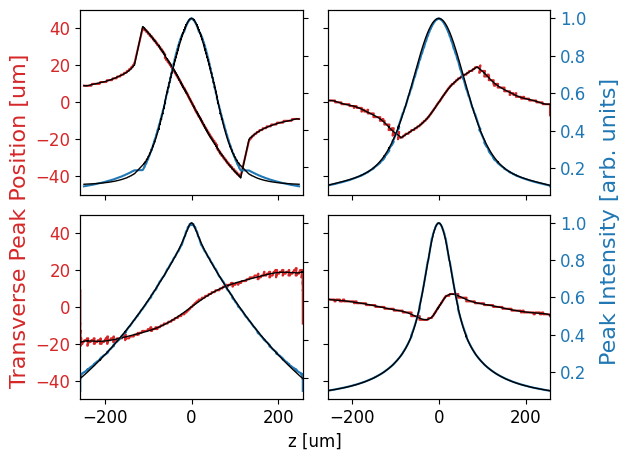

In [14]:
import matplotlib.transforms as mtransforms
transform = mtransforms.blended_transform_factory(mtransforms.IdentityTransform(), fig.transFigure)

#plot data for linear approximation
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace=-0.15)
axs[0, 0].plot(z_max_aoi_linear, x_max_aoi_linear, color='tab:red')
axs[0, 0].plot(z_max_aoi_linear, x_max_aoi_linear_fit, color='k',linewidth=1)
axs[0, 0].set_ylim(-50,50)
axs[0, 0].set_xlim(-256,256)
axs[0, 0].set_xticklabels([])
axs[0, 0].tick_params(axis='y', labelcolor='tab:red', labelsize=SMALLER_SIZE)
axs[0, 0].tick_params(axis='both', which='major', labelsize=SMALLER_SIZE)
ax2 = axs[0, 0].twinx()
ax2.plot(z_max_aoi_linear, I_max_aoi_linear/np.max(I_max_aoi_linear), color='tab:blue')
ax2.plot(z_max_aoi_linear, I_max_aoi_linear_fit/np.max(I_max_aoi_linear_fit), color='k',linewidth=1)
ax2.set_yticklabels([])



#plot data for AOI 22.8 case
axs[1, 0].plot(z_max_aoi228, x_max_aoi228, color='tab:red')
axs[1, 0].plot(z_max_aoi228, x_max_aoi228_fit, color='k',linewidth=1)
axs[1, 0].set_xlim(-256,256)
ax2 = axs[1, 0].twinx()
ax2.plot(z_max_aoi228, I_max_aoi228/np.max(I_max_aoi228), color='tab:blue')
ax2.plot(z_max_aoi228, I_max_aoi228_fit/np.max(I_max_aoi228_fit), color='k',linewidth=1)
ax2.set_yticklabels([])
axs[1, 0].set_ylim(-50,50)
axs[1, 0].tick_params(axis='y', labelcolor='tab:red', labelsize=SMALLER_SIZE)
axs[1, 0].tick_params(axis='both', which='major', labelsize=SMALLER_SIZE)
axs[1,0].yaxis.label.set_transform(transform)
axs[1, 0].set_ylabel('Transverse Peak Position [um]', color='tab:red',fontsize=SMALL_SIZE)
axs[1, 0].yaxis.label.set_position((0, 0.4))



#plot data for AOI 36.3 case
axs[0, 1].plot(z_max_aoi36, x_max_aoi36, color='tab:red')
axs[0, 1].plot(z_max_aoi36, x_max_aoi36_fit, color='k',linewidth=1)
axs[0, 1].set_xlim(-256,256)
ax2 = axs[0, 1].twinx()
ax2.plot(z_max_aoi36, I_max_aoi36/np.max(I_max_aoi36), color='tab:blue')
ax2.plot(z_max_aoi36, I_max_aoi36_fit/np.max(I_max_aoi36_fit), color='k',linewidth=1)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=SMALLER_SIZE)
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xticklabels([])
axs[0, 1].set_ylim(-50,50)
axs[0, 1].tick_params(axis='both', which='major', labelsize=SMALLER_SIZE)



#plot data for AOI 52.8 case
axs[1, 1].plot(z_max_aoi528, x_max_aoi528, color='tab:red')
axs[1, 1].plot(z_max_aoi528, x_max_aoi528_fit, color='k',linewidth=1)
axs[1, 1].set_yticklabels([])
axs[1, 1].set_ylim(-50,50)
axs[1, 1].set_xlim(-256,256)
axs[1, 1].tick_params(axis='both', which='major', labelsize=SMALLER_SIZE)
ax2 = axs[1, 1].twinx()
ax2.plot(z_max_aoi528, I_max_aoi528/np.max(I_max_aoi528), color='tab:blue')
ax2.plot(z_max_aoi528, I_max_aoi528_fit/np.max(I_max_aoi528_fit), color='k',linewidth=1)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=SMALLER_SIZE)
ax2.yaxis.label.set_transform(transform)
ax2.set_ylabel('Peak Intensity [arb. units]', color='tab:blue',fontsize=SMALL_SIZE,labelpad=10)
ax2.yaxis.label.set_position((0, 0.4))



fig.supxlabel('z [um]', y=0.05)

fig.tight_layout()

# plt.savefig(FILE_DIR+"x_shift_intensity.pdf",bbox_inches = "tight")
plt.show()


Generates plots for Fig. 5

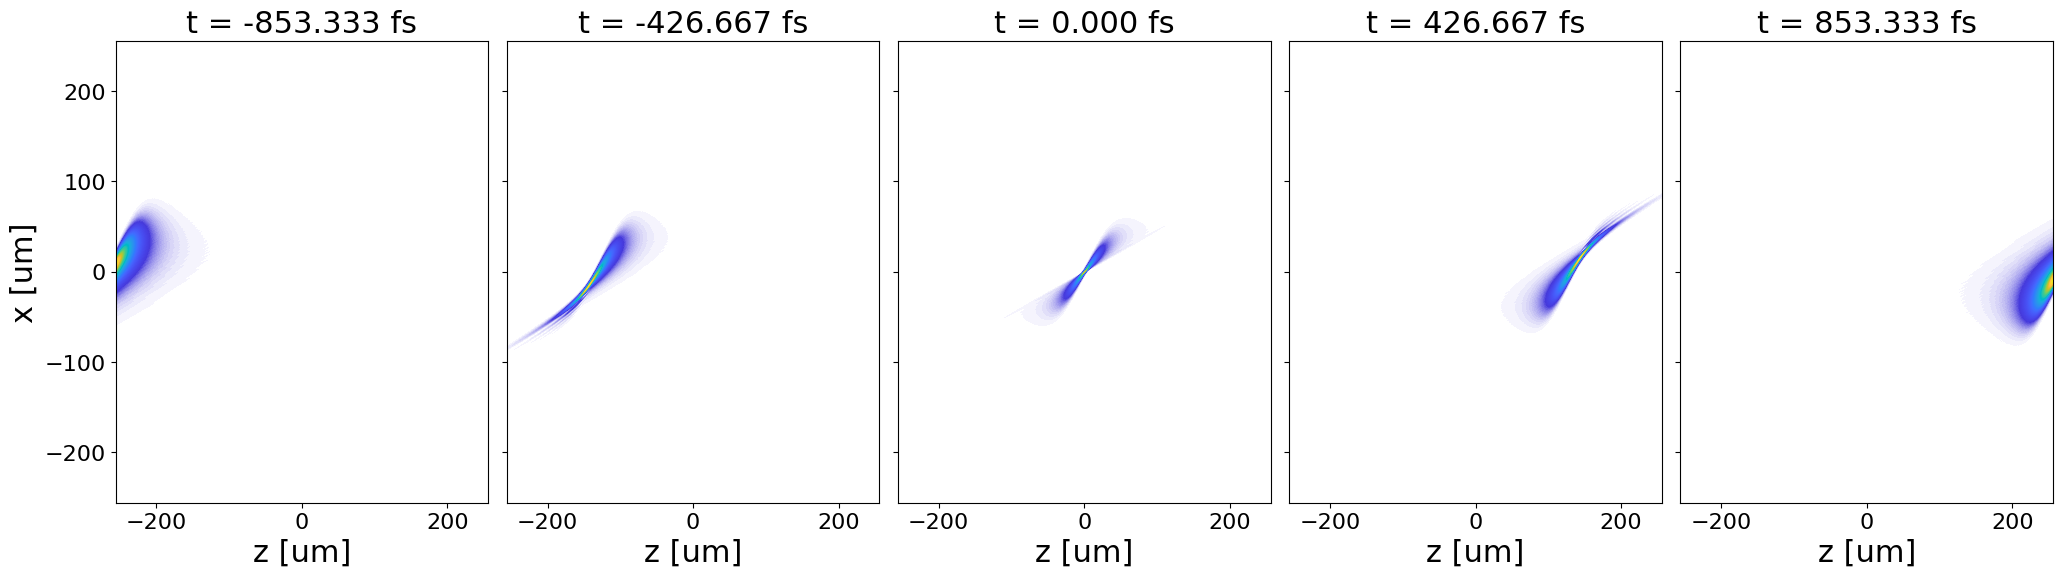

In [19]:
#load in files
z_img_load=np.load(FILE_DIR+'z_img_aoi228.npy')
z_times_load=np.load(FILE_DIR+'z_times_aoi228.npy')

#define field for AOI 22.8 deg case
aoi228=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0., separation=1.97236328, d=1/(1480*10), aoi=np.deg2rad(22.8), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)

#construct field and propagate to focus
aoi228.construct_eField(plot=False)
aoi228.fraunhofer()

#extract values from fields
timeshift=aoi228.timeshift #seconds
x2_max=aoi228.x2.max()*1e4 #um

#define x and z spatial dimensions from simulation
x2=np.linspace(-x2_max,x2_max,Nx) #um
z2=np.linspace(-x2_max,x2_max,len(z_times_load)) #um

#array to store (x,z) fields that will be plotted
z_plot_t0=np.zeros((len(z_times_load),Nx))


#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loop through and splice field data that is in (x,t) space into (x,z) space at vairous time steps
for t_step in range(5):
    #index of timeshift set so that 5 evenly spaced plots are generated 
    time=np.round(timeshift[t_step*2048]*1e15,3) #fs
    
    for j in range(len(z_times_load)):
        if np.size(np.argwhere(np.round(z_times_load[j],3)==time)) > 0 and np.argwhere(np.round(z_times_load[j],3)==time):
            idx=np.argwhere(np.round(z_times_load[j],3)==time)[0][0]
            z_plot_t0[j]=(z_img_load[j,idx,:])
        else:
            z_plot_t0[j]=np.zeros((Nx))
    
    #plot the data for the given time step
    ax[t_step].imshow((z_plot_t0[:,:].T),aspect='auto',origin='lower',extent=[timeshift.min()*1e15*0.3,timeshift.max()*1e15*0.3,-x2_max,x2_max],cmap=cmap)

    ax[t_step].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[t_step].set_title(f't = {time:.3f} fs',fontsize=MEDIUM_SIZE)
    ax[t_step].set_xlabel('z [um]',fontsize=MEDIUM_SIZE)
    if t_step != 0:
        ax[t_step].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)
# plt.savefig(FILE_DIR+"z_aoi228.pdf",bbox_inches = "tight")
plt.show()

del z_img_load

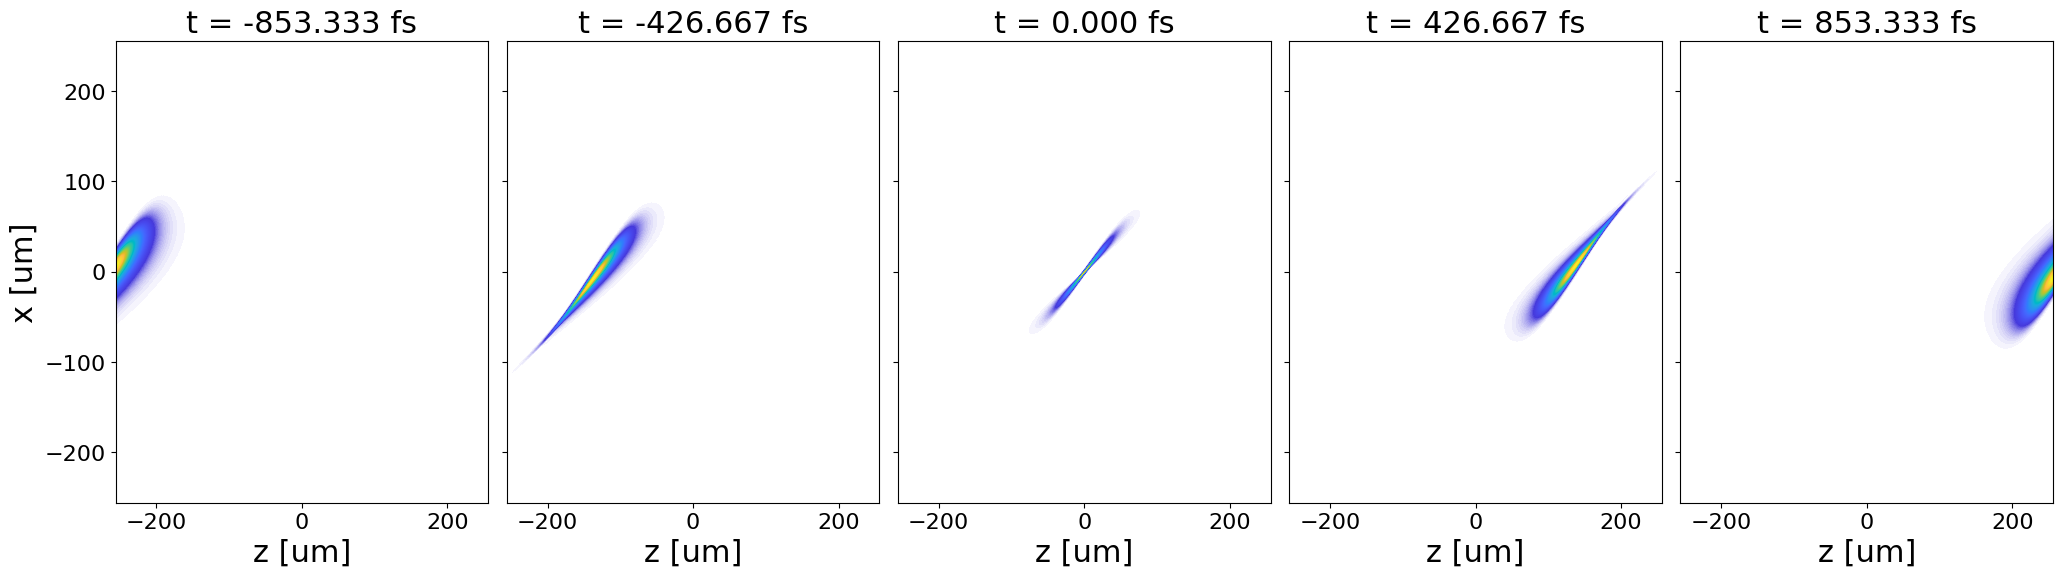

In [20]:
#load in files
z_img_load=np.load(FILE_DIR+'z_img_aoi36.npy')
z_times_load=np.load(FILE_DIR+'z_times_aoi36.npy')

#define field for AOI 36.3 deg case
aoi36=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20,deltax=0., separation=4.45043945, d=1/(1480*10), aoi=np.deg2rad(36.3), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)

#construct field and propagate to focus
aoi36.construct_eField(plot=False)
aoi36.fraunhofer()

#extract values from fields
timeshift=aoi36.timeshift #seconds
x2_max=aoi36.x2.max()*1e4 #um

#define x and z spatial dimensions from simulation
x2=np.linspace(-x2_max,x2_max,Nx) #um
z2=np.linspace(-x2_max,x2_max,len(z_times_load)) #um

#array to store (x,z) fields that will be plotted
z_plot_t0=np.zeros((len(z_times_load),Nx))

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loop through and splice field data that is in (x,t) space into (x,z) space at vairous time steps
for t_step in range(5):
    #index of timeshift set so that 5 evenly spaced plots are generated 
    time=np.round(timeshift[t_step*2048]*1e15,3) #fs
    
    for j in range(len(z_times_load)):
        if np.size(np.argwhere(np.round(z_times_load[j],3)==time)) > 0 and np.argwhere(np.round(z_times_load[j],3)==time):
            idx=np.argwhere(np.round(z_times_load[j],3)==time)[0][0]
            z_plot_t0[j]=(z_img_load[j,idx,:])
        else:
            z_plot_t0[j]=np.zeros((Nx))
            
    #plot the data for the given time step
    ax[t_step].imshow((z_plot_t0[:,:].T),aspect='auto',origin='lower',extent=[timeshift.min()*1e15*0.3,timeshift.max()*1e15*0.3,-x2_max,x2_max],cmap=cmap)

    ax[t_step].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[t_step].set_title(f't = {time:.3f} fs',fontsize=MEDIUM_SIZE)
    ax[t_step].set_xlabel('z [um]',fontsize=MEDIUM_SIZE)
    if t_step != 0:
        ax[t_step].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)
# plt.savefig(FILE_DIR+"z_aoi36.pdf",bbox_inches = "tight")
plt.show()

del z_img_load

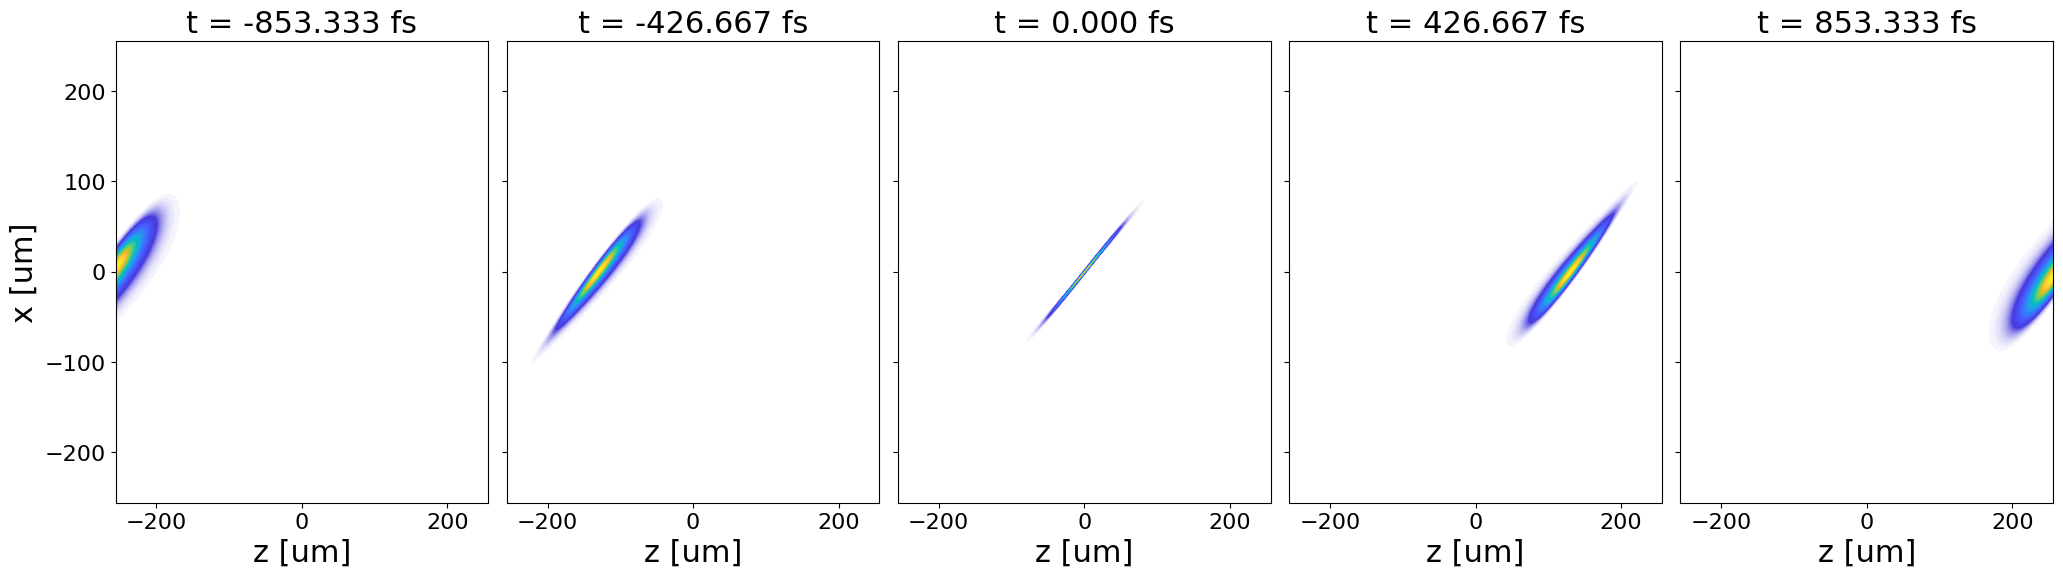

In [21]:
#load in files
z_img_load=np.load(FILE_DIR+'z_img_aoi528.npy')
z_times_load=np.load(FILE_DIR+'z_times_aoi528.npy')

#define field for AOI 52.8 deg case
aoi528=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20, deltax=0., separation=6.59560547, d=1/(1480*10), aoi=np.deg2rad(52.8), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)

#construct field and propagate to focus
aoi528.construct_eField(plot=False)
aoi528.fraunhofer()

#extract values from fields
timeshift=aoi528.timeshift #seconds
x2_max=aoi528.x2.max()*1e4 #um

#define x and z spatial dimensions from simulation
x2=np.linspace(-x2_max,x2_max,Nx) #um
z2=np.linspace(-x2_max,x2_max,len(z_times_load)) #um

#array to store (x,z) fields that will be plotted
z_plot_t0=np.zeros((len(z_times_load),Nx))

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loop through and splice field data that is in (x,t) space into (x,z) space at vairous time steps
for t_step in range(5):
    #index of timeshift set so that 5 evenly spaced plots are generated 
    time=np.round(timeshift[t_step*2048]*1e15,3) #fs
    
    for j in range(len(z_times_load)):
        if np.size(np.argwhere(np.round(z_times_load[j],3)==time)) > 0 and np.argwhere(np.round(z_times_load[j],3)==time):
            idx=np.argwhere(np.round(z_times_load[j],3)==time)[0][0]
            z_plot_t0[j]=(z_img_load[j,idx,:])
        else:
            
            z_plot_t0[j]=np.zeros((Nx))
            
    #plot the data for the given time step
    ax[t_step].imshow((z_plot_t0[:,:].T),aspect='auto',origin='lower',extent=[timeshift.min()*1e15*0.3,timeshift.max()*1e15*0.3,-x2_max,x2_max],cmap=cmap)

    ax[t_step].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[t_step].set_title(f't = {time:.3f} fs',fontsize=MEDIUM_SIZE)
    ax[t_step].set_xlabel('z [um]',fontsize=MEDIUM_SIZE)
    if t_step != 0:
        ax[t_step].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)
# plt.savefig(FILE_DIR+"z_aoi528.pdf",bbox_inches = "tight")
plt.show()

del z_img_load

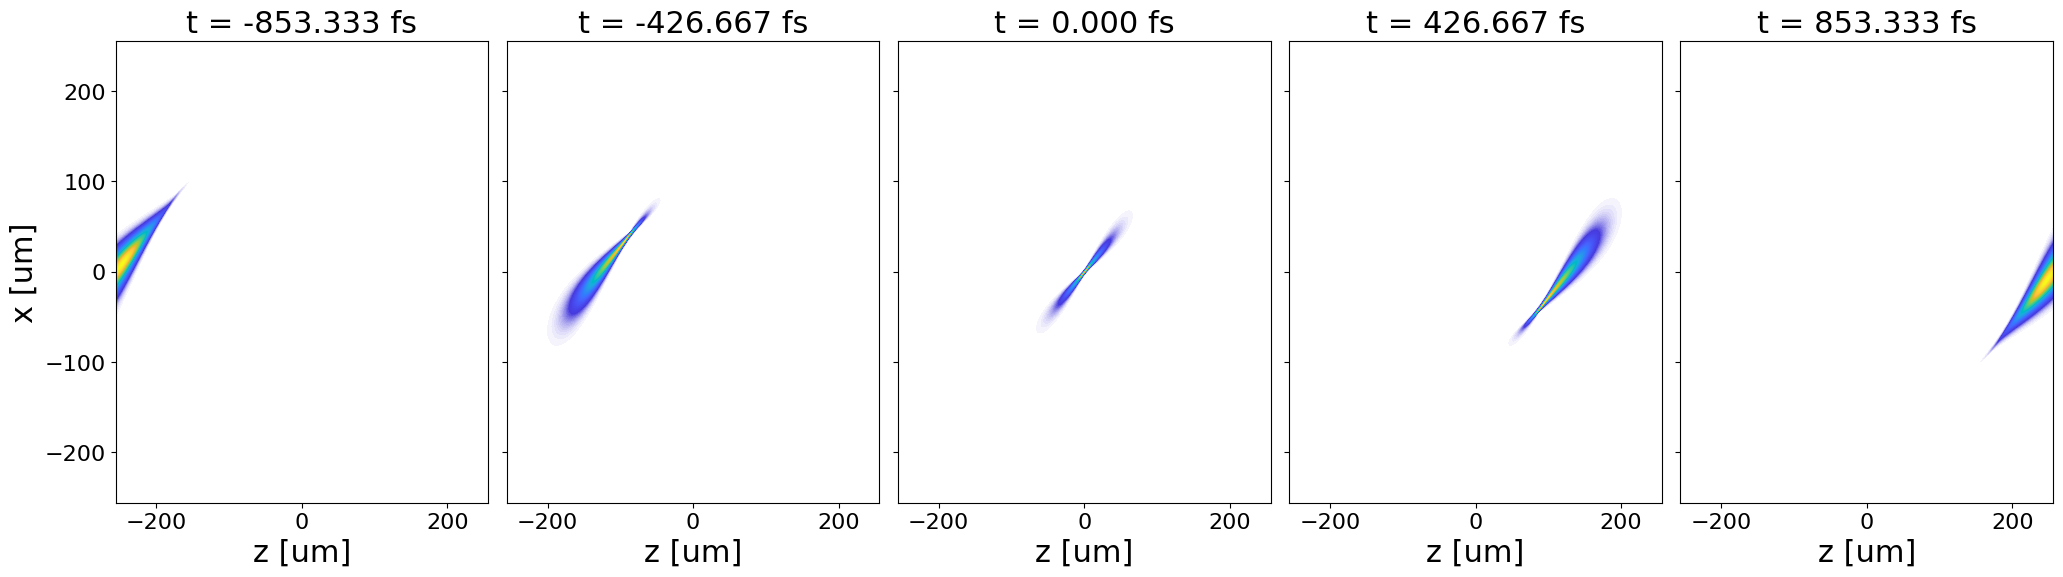

In [22]:
#load in files
z_img_load=np.load(FILE_DIR+'z_img_aoi_linear.npy')
z_times_load=np.load(FILE_DIR+'z_times_aoi_linear.npy')

#define field for linear approximation case
aoi_linear=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear', BAR=20.98034668, deltax=0., separation=4.45043945, d=1/(1480*10), aoi=np.deg2rad(36.3), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)

#construct field and propagate to focus
aoi_linear.construct_eField(plot=False)
aoi_linear.fraunhofer()

#extract values from fields
timeshift=aoi_linear.timeshift #seconds
x2_max=aoi_linear.x2.max()*1e4 #um

#define x and z spatial dimensions from simulation
x2=np.linspace(-x2_max,x2_max,Nx) #um
z2=np.linspace(-x2_max,x2_max,len(z_times_load)) #um

#array to store (x,z) fields that will be plotted
z_plot_t0=np.zeros((len(z_times_load),Nx))

#define figure for plotting
fig,ax = plt.subplots(1,5,figsize=(25,6))
plt.subplots_adjust(wspace=0.05)
ax = ax.ravel()

#loop through and splice field data that is in (x,t) space into (x,z) space at vairous time steps
for t_step in range(5):
    #index of timeshift set so that 5 evenly spaced plots are generated 
    time=np.round(timeshift[t_step*2048]*1e15,3) #fs
    
    for j in range(len(z_times_load)):
        if np.size(np.argwhere(np.round(z_times_load[j],3)==time)) > 0 and np.argwhere(np.round(z_times_load[j],3)==time):
            idx=np.argwhere(np.round(z_times_load[j],3)==time)[0][0]
            z_plot_t0[j]=(z_img_load[j,idx,:])
        else:
            z_plot_t0[j]=np.zeros((Nx))

    #plot the data for the given time step
    ax[t_step].imshow((z_plot_t0[:,:].T),aspect='auto',origin='lower',extent=[timeshift.min()*1e15*0.3,timeshift.max()*1e15*0.3,-x2_max,x2_max    ],cmap=cmap)
    ax[t_step].tick_params(axis='both', which='major', labelsize=SMALL_SIZE)
    ax[t_step].set_title(f't = {time:.3f} fs',fontsize=MEDIUM_SIZE)
    ax[t_step].set_xlabel('z [um]',fontsize=MEDIUM_SIZE)
    if t_step != 0:
        ax[t_step].set_yticklabels([])
ax[0].set_ylabel('x [um]',fontsize=MEDIUM_SIZE)
# plt.savefig(FILE_DIR+"z_aoi_linear.pdf",bbox_inches = "tight")
plt.show()

del z_img_load

In [ ]:
#helper function
def grating_arrangement_PFT(sep,lines, target_PFT, aoi):
    '''helper function for calculating the grating separation needed for a beam to have a desired pulse front tilt angle for defined groove density and angle of incidence
    
    Parameters
    ----------
    name (data type) [physical unit]
    
    sep (float) [cm]: grating separation
    lines (float) [lines/mm]: groove density of grating pair
    target_PFT (float) [degrees]: desired pulse front tilt angle (defined counter-clockwise from the positive z-axis)
    aoi (float) [degrees]: angle of incidence on grating
    
    Returns
    -------
    () []: difference between actual pulse front tilt given input parameters and desired pulse front tilt
    '''

    #define the field with input parameters
    field=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=10, deltax=0, separation=sep, d=1/(lines*10), aoi=np.deg2rad(aoi), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)
    
    #contstruct and propagate field to focus
    field.construct_eField(plot=False)
    field.fraunhofer()

    #calculate the pulse front tilt angle
    pft=fp.tiltAngle(np.abs(field.eFieldxt.T)**2, field.timeshift.max()*1e15, field.x2.max()*1e4,PLOTS=False)

    return np.abs(pft-target_PFT)

#input parameters

#angle of incidence
aoi=36.3

#groove density
d_grating=1480

#desired pulse front tilt value
PFT_val=45

#minimize function and print best result
res=minimize(grating_arrangement_PFT, 1, args=(d_grating,PFT_val,aoi),method='Nelder-Mead')
res.x

The following cell was used for generating the movies

In [ ]:
#set file name
FILE_NAME='aoi228'

#load in files
z_img_load=np.load(FILE_DIR+'z_img_aoi228.npy')
z_times_load=np.load(FILE_DIR+'z_times_aoi228.npy')

#define field for AOI 22.8 deg case
aoi228=fp.FourierProp(L=Lx, N=Nx, N_omega=N_omega, L_omega=L_omega, chirp_pattern='linear_grating_centered', BAR=20,deltax=0., separation=1.97236328, d=1/(1480*10), aoi=np.deg2rad(22.8), w_in=w_in, focus = focus, delta_wvl=delta_wvl, wvl_0=wvl_0)

#construct field and propagate to focus
aoi228.construct_eField(plot=False)
aoi228.fraunhofer()

#extract values from fields
timeshift=aoi228.timeshift #seconds
x2_max=aoi228.x2.max()*1e4 #um

#define x and z spatial dimensions from simulation
x2=np.linspace(-x2_max,x2_max,Nx) #um
z2=np.linspace(-x2_max,x2_max,len(z_times_load)) #um

#array to store (x,z) fields that will be plotted
z_plot_t0=np.zeros((len(z_times_load),Nx))

#only plot every 8th step
speed_up_factor=8

#loop through and splice field data that is in (x,t) space into (x,z) space at vairous time steps
for i,t in enumerate(tqdm.tqdm(timeshift[::8*speed_up_factor])):
    time=np.round(t*1e15,3)
    
    for j in range(len(z_times_load)):
        if np.size(np.argwhere(np.round(z_times_load[j],3)==time)) > 0 and np.argwhere(np.round(z_times_load[j],3)==time):
            idx=np.argwhere(np.round(z_times_load[j],3)==time)[0][0]
            z_plot_t0[j]=(z_img_load[j,idx,:])
        else:
            z_plot_t0[j]=np.zeros((Nx))
    
    #plot the data for the given time step
    fig,ax=plt.subplots(figsize=(10,8))
    
    plt.subplot(221)
    plt.imshow(z_plot_t0.T,aspect='auto',origin='lower',extent=[-256,256,-256,256],cmap=cmap)
    plt.ylabel('x [um]')
    plt.xlabel('z [um]')
    fig.suptitle('$\\theta_i=22.8^\circ$'+ '(high dispersion)' + f' at $t = {time:3.0f}$ fs')

    plt.subplot(222)

    color = 'tab:red'

    plt.xlabel('z [um]',fontsize=SMALLER_SIZE)
    plt.ylabel('Transverse Peak Position [um]', color=color)

    plt.plot(z_max_aoi228[0:i*speed_up_factor], x_max_aoi228[0:i*speed_up_factor], color=color)
    plt.plot(z_max_aoi228[0:i*speed_up_factor], x_max_aoi228_fit[0:i*speed_up_factor], color='k',alpha=0.85)

    plt.tick_params(axis='y', labelcolor=color)
    plt.ylim(-50,50)
    ax2 = plt.twinx() 

    color = 'tab:blue'
    ax2.set_ylabel('Peak Intensity [arb. units]', color=color)
    
    ax2.plot(z_max_aoi228[0:i*speed_up_factor], I_max_aoi228[0:i*speed_up_factor], color=color)
    ax2.plot(z_max_aoi228[0:i*speed_up_factor], I_max_aoi228_fit[0:i*speed_up_factor], color='k',alpha=0.85)
    
    ax2.tick_params(axis='y', labelcolor=color)
    plt.xlim(-256,256)
    ax2.set_ylim(0,3)
    plt.subplots_adjust(top=0.92)

    # plt.savefig(FILE_DIR+'frames/'+FILE_NAME+f'/{i:04d}.pdf',bbox_inches='tight')
    plt.close()
    
del z_img_load